In [86]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [87]:
file=genfromtxt("./polyunkown.csv",delimiter=",")
x=file[:,0]
y=file[:,1]

In [88]:
def R2(xexp, xteo):
    EE = sum((xteo-xexp)**2)
    mean = sum(xexp)/(len(xexp))
    variance = sum((mean-xexp)**2)
    R2 = 1 - EE/variance
    return R2

In [89]:
def lagrangep(absc,j):
    pol=np.poly1d([0,1])
    k=len(absc)
    for m in range(k):
        if m!=j:
            pol*=1./(absc[j]-absc[m])*np.poly1d([1.,-absc[m]])
    return pol 

def interlagr(absc,orde):
    poly=np.poly1d([0])
    for i in range(len(absc)):
        poly+=orde[i]*lagrangep(absc,i)
    return poly

po=interlagr(file[:,0],file[:,1])
yteo=po(x)
print(po)

            39             38             37            36
-3.693e-21 x  - 2.432e-21 x  + 6.157e-19 x  + 3.52e-19 x 
              35             34             33             32
 - 4.566e-17 x  - 2.765e-17 x  + 1.959e-15 x  + 3.057e-15 x 
             31             30             29             28
 - 7.95e-14 x  + 8.041e-14 x  + 8.226e-13 x  + 1.005e-12 x 
              27             26             25             24
 - 6.333e-12 x  - 1.324e-10 x  + 8.595e-10 x  - 2.274e-09 x 
              23             22             21             20
 + 5.127e-09 x  - 1.697e-08 x  + 3.758e-08 x  - 1.425e-08 x 
              19             18             17             16
 - 7.943e-08 x  + 1.041e-07 x  - 1.494e-07 x  + 7.043e-07 x 
              15             14     13       12     11     10     9
 - 1.163e-06 x  + 2.183e-07 x  + 1 x  + 0.5 x  + 2 x  - 6 x  + 7 x
      8     7     6     5     4     3     2
 + 3 x - 5 x - 4 x + 6 x + 7 x + 1 x + 3 x + 5 x - 1


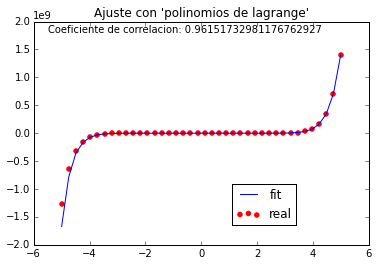

In [90]:
r2=R2(y,yteo)
figure(figsize(6,4))
scatter(x,y,color='red', label='real')
plot(x,yteo,color='blue',label='fit')
title("Ajuste con 'polinomios de lagrange'")
text(-5.5,1.8e+09,"Coeficiente de correlacion: %.20f"%r2)
legend(bbox_to_anchor=(0.8, 0.3))
show()

In [91]:
def polinomio(x,coefi):
    grado = len(coefi)-1
    y = np.zeros(len(coefi))
    for i in range (len(coefi)):
        y[i]=(x**(grado-i))*coefi[i]
    return sum(y)


for i in range(1,len(y),1):
    coefi = np.polyfit(x,y,i)
    yteo=np.zeros(len(x))
    for j in range(len(x)):
        yteo[j]=polinomio(x[j],coefi)
    r2=R2(y,yteo)
    if (r2==1):
        print('El grado es:',i)
        grado=i
        print('el polinomios es:')
        for k in range(grado):
            print('x**',grado-k,'*',coefi[k])  
        break

    

El grado es: 13
el polinomios es:
x** 13 * 0.999999999878
x** 12 * 0.500000000168
x** 11 * 2.00000001019
x** 10 * -6.00000001147
x** 9 * 6.99999968731
x** 8 * 3.00000028426
x** 7 * -4.99999561072
x** 6 * -4.00000309692
x** 5 * 5.99997097236
x** 4 * 7.0000144548
x** 3 * 1.00007963626
x** 2 * 2.9999767539
x** 1 * 4.99993968893


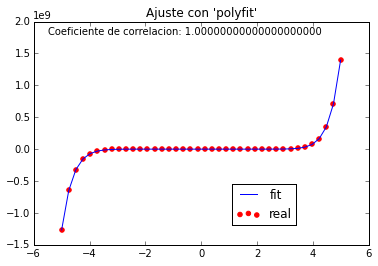

In [92]:
figure(figsize(6,4))
scatter(x,y,color='red', label='real')
plot(x,yteo,color='blue', label='fit')
title("Ajuste con 'polyfit'")
text(-5.5,1.8e+09,"Coeficiente de correlacion: %.20f"%r2)
legend(bbox_to_anchor=(0.8, 0.3))
show()